In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline

from sklearn import metrics
# KNN
from sklearn.neighbors import KNeighborsClassifier
# SVM
from sklearn import svm

### .....................................................................................................................................................................................

## LOAD DATA (Embedded Tweets)

##### Word2Vec

In [2]:
# vector_size = 50
train_word2vec_50 = pd.read_pickle("./train_tweets_vectorized_Word2Vec_vs50.pkl")
test_word2vec_50 = pd.read_pickle("./test_tweets_vectorized_Word2Vec_vs50.pkl")

# vector_size = 100
train_word2vec_100 = pd.read_pickle("./train_tweets_vectorized_Word2Vec_vs100.pkl")
test_word2vec_100 = pd.read_pickle("./test_tweets_vectorized_Word2Vec_vs100.pkl")

# vector_size = 200
train_word2vec_200 = pd.read_pickle("./train_tweets_vectorized_Word2Vec_vs200.pkl")
test_word2vec_200 = pd.read_pickle("./test_tweets_vectorized_Word2Vec_vs200.pkl")

# vector_size = 300
train_word2vec_300 = pd.read_pickle("./train_tweets_vectorized_Word2Vec_vs300.pkl")
test_word2vec_300 = pd.read_pickle("./test_tweets_vectorized_Word2Vec_vs300.pkl")

##### Bag Of Words

In [23]:
train_bagofwords = pd.read_pickle("./train_tweets_vectorized_BagOfWords.pkl")
test_bagofwords = pd.read_pickle("./test_tweets_vectorized_BagOfWords.pkl")

##### TF_IDF

In [24]:
train_tfidf = pd.read_pickle("./train_tweets_vectorized_TfIdf.pkl")
test_tfidf = pd.read_pickle("./test_tweets_vectorized_TfIdf.pkl")

#### ...

In [5]:
# Train dataset target
train_target = list(train_word2vec_300['Sentiment'])
print(len(train_target))

28057


In [6]:
#Load train dataset
def load_data(file, col_names, n=0):
    #Read all data
    if n==0:
        data = pd.read_csv(file, sep="\t", header=None, names=col_names, quoting=csv.QUOTE_NONE, error_bad_lines=False)
    #Read specific number of rows of data
    else:
        data = pd.read_csv(file, nrows=n, sep="\t", header=None, names=col_names, quoting=csv.QUOTE_NONE, error_bad_lines=False)
    return data

In [7]:
# Actual Test Prediction
file = "../twitter_data/SemEval2017_task4_subtaskA_test_english_gold.txt"
col_names = ['TweetID', 'Sentiment']
actual_prediction = load_data(file, col_names)

In [8]:
# Remove from actual predictions rows that include empty tweets
for i in range(0, actual_prediction.shape[0]):
    if i not in test_word2vec_50.index:
        actual_prediction = actual_prediction.drop(actual_prediction.index[i])

# list of actual prediction
actual_prediction = list(actual_prediction['Sentiment'])
# print(len(actual_prediction))

### .....................................................................................................................................................................................

## TRAINING MODELS

In [9]:
# Target values
target = ['positive', 'negative', 'neutral']

### K-nearest neighbors (KNN) classification

In [10]:
def KNN_Classification(k, data, target):
    # "Instantiate" the "estimator"
    knn = KNeighborsClassifier(n_neighbors=k) 
    # Fit the model with data
    knn.fit(data, target)
    return knn

In [11]:
def KNN_Prediction(knn, data, actual_prediction):
    # predict the response for new observations
    prediction = knn.predict(data)
    accuracy = metrics.accuracy_score(actual_prediction, prediction)
    return accuracy

In [12]:
def KNN(train_data, train_target, test_data, actual_prediction, k):
    knn = KNN_Classification(k, train_data, train_target)
    pred_acur = KNN_Prediction(knn, test_data, actual_prediction)
    return pred_acur

### ---------------------------------------------------------------------------------------------------------------------------------------------

### Support Vector Machines (SVM)

In [13]:
def SVM_Classification(data, target):
    # "Instantiate" the "estimator"
    SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
    # Fit the model with data
    SVM.fit(data, target)
    return SVM

In [14]:
def SVM_Prediction(SVM, data, actual_prediction):
    # predict the response for new observations
    prediction = SVM.predict(data)
    accuracy = metrics.accuracy_score(actual_prediction, prediction)
    return accuracy

In [15]:
def SVM(train_data, train_target, test_data, actual_prediction):
    SVM = SVM_Classification(train_data, train_target)
    pred_acur = SVM_Prediction(SVM, test_data, actual_prediction)
    return pred_acur

### ---------------------------------------------------------------------------------------------------------------------------------------------

In [16]:
# Store results from training and predictions
results_KNN = "KNN ACCURACY\n"
results_SVM = "SVM ACCURACY\n"

##### Word2Vec

In [17]:
# 50
train_data = train_word2vec_50['Vector'].values
test_data = test_word2vec_50['Vector'].values



results_KNN += "Word2Vec(50) : " + str(KNN(list(train_data), train_target, list(test_data), actual_prediction, 5)) + "\n"
results_SVM += "Word2Vec(50) : " + str(SVM(list(train_data), train_target, list(test_data), actual_prediction)) + "\n"

# print("KNN accuracy - Word2Vec(50) :",  KNN(list(train_data), train_target, list(test_data), actual_prediction, 5))
# print("SVM accuracy - Word2Vec(50) :",  SVM(list(train_data), train_target, list(test_data), actual_prediction))

In [18]:
# 100
train_data = train_word2vec_100['Vector'].values
test_data = test_word2vec_100['Vector'].values

results_KNN += "Word2Vec(100) : " + str(KNN(list(train_data), train_target, list(test_data), actual_prediction, 5)) + "\n"
results_SVM += "Word2Vec(100) : " + str(SVM(list(train_data), train_target, list(test_data), actual_prediction)) + "\n"

In [19]:
# 200
train_data = train_word2vec_200['Vector'].values
test_data = test_word2vec_200['Vector'].values

results_KNN += "Word2Vec(200) : "
results_SVM += "Word2Vec(200) : " + str(SVM(list(train_data), train_target, list(test_data), actual_prediction)) + "\n"

Text(0,0.5,'Testing Accuracy')

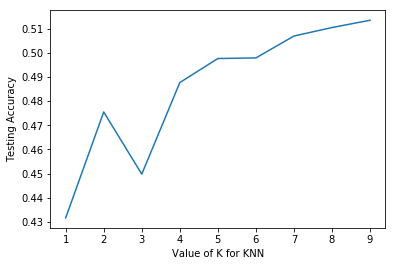

In [20]:
# Find best k for KNN in above model (wordvec with vector size equal to 200)
k_range = list(range(1, 10))
scores = []
for k in k_range:
    scores.append(KNN(list(train_data), train_target, list(test_data), actual_prediction, k))
results_KNN += str(max(scores)) + "\n"
# Plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [21]:
# 300
train_data = train_word2vec_300['Vector'].values
test_data = test_word2vec_300['Vector'].values

results_KNN += "Word2Vec(300) : " + str(KNN(list(train_data), train_target, list(test_data), actual_prediction, 5)) + "\n"
results_SVM += "Word2Vec(300) : " + str(SVM(list(train_data), train_target, list(test_data), actual_prediction)) + "\n"

##### Bag Of Words

In [25]:
train_bagofwords = train_bagofwords[:20000]
test_bagofwords = test_bagofwords[:20000]
train_target = train_target[:20000]
actual_prediction = actual_prediction[:20000]

results_KNN += "Bag Of Words : " + str(KNN(train_bagofwords, train_target, test_bagofwords, actual_prediction, 5)) + "\n"
results_SVM += "Bag Of Words : " + str(SVM(train_bagofwords, train_target, test_bagofwords, actual_prediction)) + "\n"

##### TF-IDF

In [26]:
train_tfidf = train_tfidf[:20000]
test_tfidf = test_tfidf[:20000]
train_target = train_target[:20000]
actual_prediction = actual_prediction[:20000]

results_KNN += "TF-IDF : " + str(KNN(train_tfidf, train_target, test_tfidf, actual_prediction, 5)) + "\n"
results_SVM += "TF-IDF : " + str(SVM(train_tfidf, train_target, test_tfidf, actual_prediction)) + "\n"

In [27]:
print(results_KNN)
print(results_SVM)
file = open("./RESULTS.txt", "w")
file.write(results_KNN)
file.write("\n")
file.write(results_SVM)
file.close()

KNN ACCURACY
Word2Vec(50) : 0.4751448861317443
Word2Vec(100) : 0.4744102522243082
Word2Vec(200) : 0.5134274753081381
Word2Vec(300) : 0.473593992327157
Bag Of Words : 0.46861480695453434
TF-IDF : 0.4178434413517264

SVM ACCURACY
Word2Vec(50) : 0.24300057138192802
Word2Vec(100) : 0.3798873561341931
Word2Vec(200) : 0.48322585911354177
Word2Vec(300) : 0.2129622071667619
Bag Of Words : 0.4205370990123255
TF-IDF : 0.4584115582401437

